# Data Analysis Project: Bike Sharing Dataset
- Name: Melody Victorian Angel Johany
- Email: melodyvictorian22@gmail.com
- Id Dicoding: melodyvictorian

## Determine Business Questions



1. In what season does the number of bicycle rentals increase?
2. In what kind of weather do people want to rent a bicycle?
3. What is the pattern of bicycle rental by day, month and time?




## Prepare the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Wrangling

### Gathering Data

In [ ]:
# upload file csv dari lokal ke google collab
from google.colab import files
data_to_load = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [ ]:
# dataframe day
day_df = pd.read_csv(io.BytesIO(data_to_load['day.csv']))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#dataframe hour
hour_df = pd.read_csv(io.BytesIO(data_to_load['hour.csv']))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Has 2 dataframes, namely **day_df** and **hour_df** which are used for analysis. **day_df** is a table based on months while **hour_df** is a table based on time.

### Assessing Data

### Day Table

Checking the data type in the **day_df** table

In [ ]:
# memeriksa tipe data tabel day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Displays the number of missing values in the **day_df** table

In [ ]:
# menampilkan jumlah missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking the number of duplicates in the **day_df** table

In [ ]:
# memeriksa duplikasi data
print("Jumlah duplikasi :",day_df.duplicated().sum())

Jumlah duplikasi : 0


Checking statistical parameters on the **day_df** table

In [ ]:
# memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour Table

Checking the data type in the **hour_df** table

In [ ]:
# memeriksa tipe data tabel hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Check the number of missing values in the **hour_df** table

In [ ]:
# menampilkan jumlah missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Checking the number of duplicates in the **hour_df** table

In [ ]:
# memeriksa duplikasi data
print("Jumlah duplikasi :",hour_df.duplicated().sum())

Jumlah duplikasi : 0


Checking statistical parameters in the **hour_df** table

In [ ]:
# memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Change the Object data type in the 'dteday' column to the datetime data type in the **day_df** table

In [ ]:
# mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Change the Object data type in the 'dteday' column to the datetime data type in the **hour_df** table

In [ ]:
# mengubah tipe data dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Added day column to **day_df** table

In [ ]:
# menambahkan nama hari pada dataframe
day_df['day_of_week'] = pd.to_datetime(day_df['dteday']).dt.day_name()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


## Exploratory Data Analysis (EDA)

Before carrying out further data exploration, it is best to check the correlation between columns to get a good exploration.

### Correlation table between columns in the **day_df** dataframe

In [ ]:
day_df.corr()

<ipython-input-18-2760edc27d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Based on the analysis of the correlation table above, the 'cnt' column and the 'temp' column have a high correlation value 0.62.

### Check the summary of statistical parameters in the **day_df** table

In [ ]:
# memeriksa rangkuman parameter statistik
day_df.describe(include="all")

<ipython-input-19-1f868a7dc295>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN


Based on statistical parameters, the temp column has a value range of 0.05 to 0.86 and the average is 0.49. The atemp column has a value range of 0.07 to 0.84 and the average is 0.47. The hum column has a value range of 0 to 0.97 and the average is 0.62. The windspeed column has a value range of 0.02 to 0.50 and has an average of 0.19.

### Check the summary of statistical parameters in the **hour_df** table

In [ ]:
# memeriksa rangkuman parameter statistik
hour_df.describe(include="all")

<ipython-input-20-dfb35c3409ce>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Based on statistical parameters, the temp column has a value range of 0.02 to 1 and the average is 0.49. The atemp column has a value range of 0 to 1 and the average is 0.47. The hum column has a value range of 0 to 1 and the average is 0.62. The windspeed column has a value range of 0 to 0.85 and has an average of 0.19.

### Pivot table for number of bicycle renters based on season and temperature per day.

In [ ]:
# tabel penyewa sepeda berdasarkan musim dan temperatur per hari
day_df.groupby(by="season").agg({
    "season":"count",
    "temp": ["max", "min", "mean"]
})

season      temp                    
        count       max       min      mean
season                                     
1         181  0.572500  0.059130  0.297748
2         184  0.808333  0.253043  0.544405
3         188  0.861667  0.469167  0.706309
4         178  0.657500  0.220833  0.422906

Based on the pivot table above, the season with the highest number of bicycle renters is season 3 or autumn. It has a temperature value range of 0.46 to 0.86 with an average of 0.70.

### Pivot table for number of bicycle renters based on season and hourly temperature

In [ ]:
# tabel penyewa sepeda berdasarkan musim dan temperatur per jam
hour_df.groupby(by="season").agg({
    "season":"count",
    "temp": ["max", "min", "mean"]
})

season  temp                
        count   max   min      mean
season                             
1        4242  0.72  0.02  0.299147
2        4409  0.94  0.16  0.544663
3        4496  1.00  0.38  0.706410
4        4232  0.76  0.14  0.423138

Based on the pivot table above, the highest number of bicycle renters is in the 3rd season or autumn. It has a temperature value range of 0.38 to 1 and has an average of 0.70.

### Pivot table for number of bicycle renters based on weather and temperature per day.

In [ ]:
# tabel penyewa sepeda berdasarkan cuaca dan temperatur per hari
day_df.groupby(by="weathersit").agg({
    "weathersit":"count",
    "temp": ["max", "min", "mean"]
})

weathersit      temp                   
                count       max      min      mean
weathersit                                        
1                 463  0.861667  0.05913  0.511541
2                 247  0.815000  0.10750  0.470366
3                  21  0.633913  0.21750  0.433440

Based on the pivot table above, the highest number of bicycle renters is in weather 1 or sunny weather. With a temperature value range of 0.05 to 0.86 and an average of 0.51.

### Pivot table for the number of bicycle renters based on weather and temperature per hour.

In [ ]:
# tabel penyewa sepeda berdasarkan cuaca dan temperatur per jam
hour_df.groupby(by="weathersit").agg({
    "weathersit":"count",
    "temp": ["max", "min", "mean"]
})

weathersit  temp                
                count   max   min      mean
weathersit                                 
1               11413  1.00  0.02  0.511054
2                4544  0.96  0.02  0.474445
3                1419  0.92  0.08  0.456688
4                   3  0.22  0.14  0.186667

Based on the pivot table above, the largest number of bicycle renters is in weather 1 or sunny weather. With a temperature value range of 0.02 to 1 and an average of 0.51.

### Pivot table for number of bike renters per month

In [ ]:
# jumlah penyewa sepeda per bulan
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False)

mnth
1     62
5     62
7     62
8     62
10    62
12    62
3     60
4     60
6     60
9     60
11    60
2     57
Name: cnt, dtype: int64

Based on the table above, the highest number of bicycle renters are on January, May, July, August, October and December.

### Pivot table for number of bicycle renters per day

In [ ]:
# jumlah penyewa sepeda per hari
day_df.groupby(by="day_of_week").cnt.nunique().sort_values(ascending=False)

day_of_week
Friday       104
Monday       104
Sunday       104
Tuesday      104
Thursday     103
Wednesday    103
Saturday     102
Name: cnt, dtype: int64

Based on the table above, the highest number of bicycle renters are on Friday, Monday, Sunday and Tuesday.

### Pivot table for number of bicycle renters per hour

In [ ]:
# jumlah penyewa sepeda per jam
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

Based on the table above, the highest number of bicycle renters is at 17 or 5 in the afternoon.

## Visualization & Explanatory Analysis

### Scatter plot of correlation between number of bicycle renters and temperature

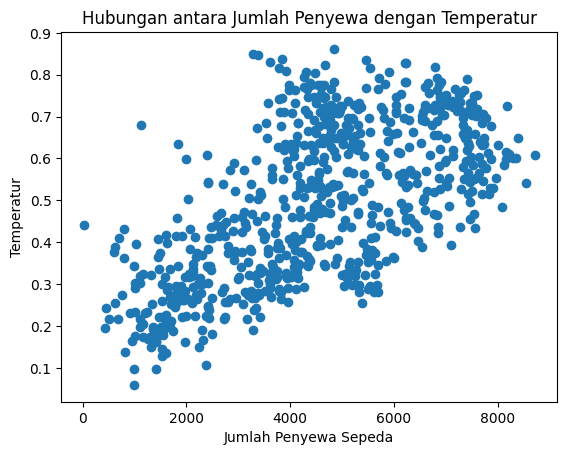

In [ ]:
# Scatter plot cnt dan temp
plt.scatter(day_df['cnt'], day_df['temp'])
plt.title('Hubungan antara Jumlah Penyewa dengan Temperatur')
plt.xlabel('Jumlah Penyewa Sepeda')
plt.ylabel('Temperatur')
plt.show()

Based on the shape of the scatter plot and the correlation value, the correlation in the column for the number of bicycle renters and temperature has a positive correlation level.

### Question 1: In what season does the number of bicycle rentals increase?

---



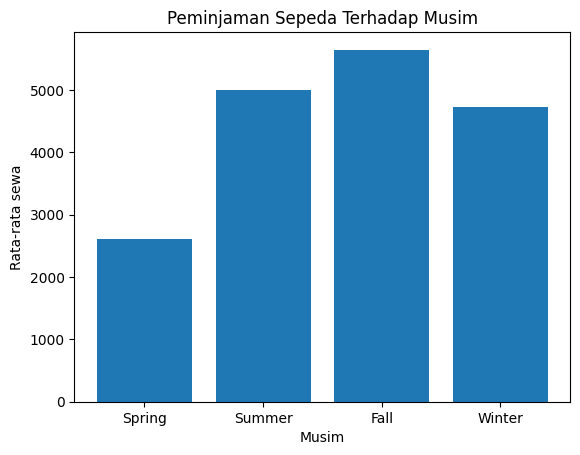

In [ ]:
season_df = day_df.groupby(by="season").cnt.mean()

season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season, season_df)
plt.xlabel('Musim')
plt.ylabel('Rata-rata sewa')
plt.title('Peminjaman Sepeda Terhadap Musim')
plt.show()

### Question 2: In what kind of weather do people want to rent a bike?

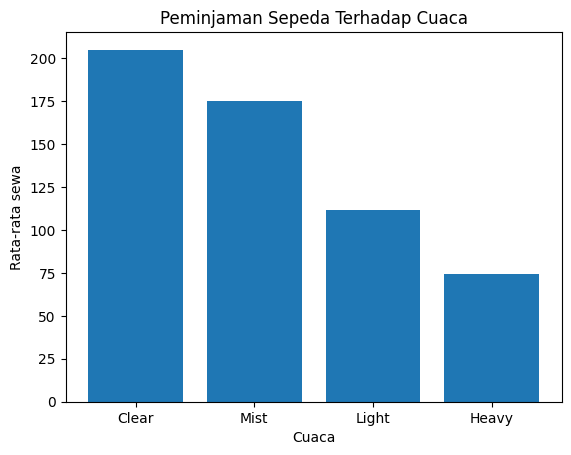

In [ ]:
weather_df = hour_df.groupby(by="weathersit").cnt.mean()

weather = ['Clear', 'Mist', 'Light', 'Heavy']
plt.bar(weather, weather_df)
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata sewa')
plt.title('Peminjaman Sepeda Terhadap Cuaca')
plt.show()

### Question 3: What is the pattern of borrowing bicycles by day, month and time?

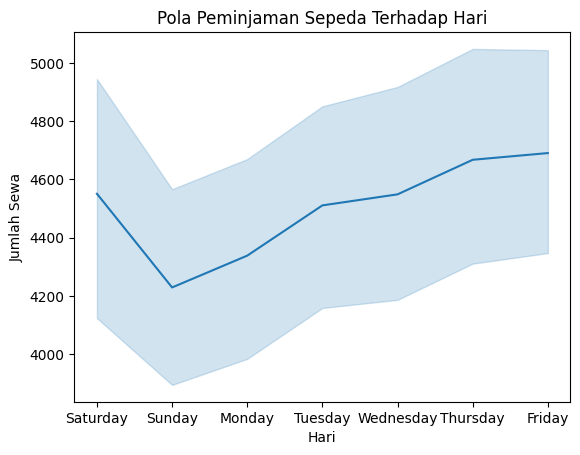

In [ ]:
# Pola peminjaman sepeda terhadap hari
sns.lineplot(x="day_of_week", y="cnt", data=day_df)
plt.title("Pola Peminjaman Sepeda Terhadap Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Sewa")
plt.show()

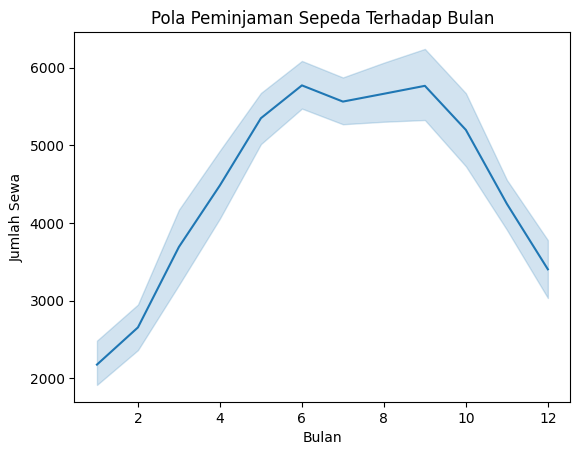

In [ ]:
# Pola peminjaman sepeda terhadap bulan
sns.lineplot(x="mnth", y="cnt", data=day_df)
plt.title("Pola Peminjaman Sepeda Terhadap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa")
plt.show()

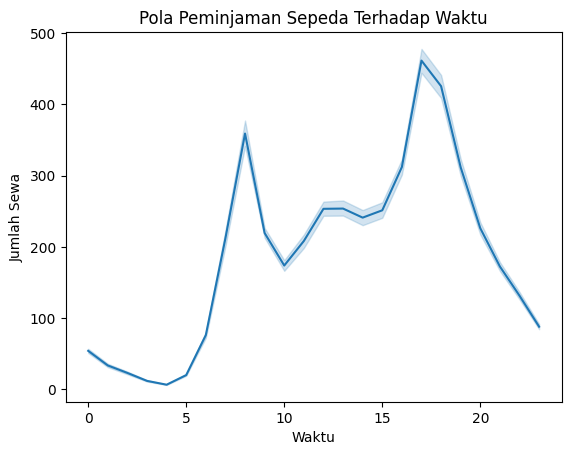

In [ ]:
# Pola peminjaman sepeda terhadap waktu
sns.lineplot(x="hr", y="cnt", data=hour_df)
plt.title("Pola Peminjaman Sepeda Terhadap Waktu")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Sewa")
plt.show()

## Conclusion

1. In what season does the number of bicycle rentals increase?


Based on the results from the bar chart above, the number of bicycle rentals increases in the fall.

2. In what kind of weather do people want to rent a bike?

Based on the results from the bar chart above, people want to rent bicycles when the weather is clear.

3. What is the pattern of bicycle rental by day, month and time?

Based on the results from the line chart above, the daily bicycle rental pattern increases on weekdays (Monday to Friday). The monthly bicycle rental pattern increases from January to May, and increases again from July to September. Meanwhile, the pattern of renting bicycles over time increases when coming to work (8 o'clock) and leaving work (17 o'clock).